# Network Intrusion Detection using Machine Learning - Exploratory Data Analysis

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

<h3>Plan of Action</h3>

1. Read dataset
2. EDA
    a. Feature correlation with each other
    b. Pair plots of features with high correlation
    c. Count Plot of target variables
    d. Count plot of features
    e. Distribution plot of pdf of features
3. Clean - null values, handle outliers, and drop highly correlated features
4. Feature Engineering
    a. Total_packets
5. Standardise numeric values
6. One hot encoding

## 1.1 Reading the dataset

In [2]:
#Read train dataset
train_data = pd.read_csv('dataset/test/UNSW_NB15_testing-set.csv')

train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
#Read test dataset
test_data = pd.read_csv('dataset/train/UNSW_NB15_training-set.csv')
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


## 1.2 Exploratory Data Analysis

### 1.2.1 Basic details about our dataset

In [66]:
#Details about train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [67]:
#Dataset containing all the feature names and their description
features = pd.read_csv("dataset/features/UNSW_NB15_features.csv")
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [4]:
#Number of null values of service variable
print("Number of null values for service variable: ", len(train_data['service'][train_data['service']=='-']))

#Number of null values for state variable
print("Number of null values for state variable: ", len(train_data['state'][train_data['state']=='-']))

Number of null values for service variable:  94168
Number of null values for state variable:  0


### Observation

1. Using train_data.info() we observe that no features here contains null values.
2. But when we import features dataset and observe each feature descriptions we get two findings
    a. Feature named 'state' Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state). Hence we need to carefuly observe here that whenever '-' occurs that corresponds to the null values in the dataset which is not caught by train_data.info(). We would need to handle this later.
    b. Similarly feature named as 'service' has values http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service. Hence we would also need to handle these null values.
3. On further analysis we find that Number of null values for service variable:  94168 but for state it is 0.
4. Hence in data preprocessing we would need to handle these null values.

### 1.2.2 Correlation between features of our dataset

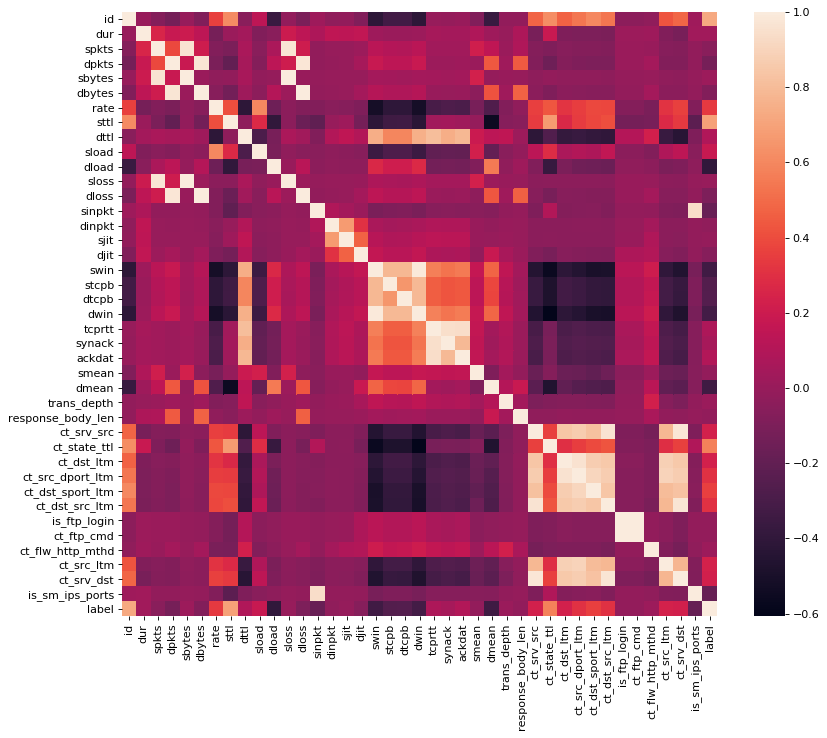

In [69]:
#Feature Correlation with each other
plt.figure(figsize=(12, 10), dpi=80)
feat_corr = train_data.corr(method='pearson')
corr_plot = sns.heatmap(feat_corr)
plt.show()

In [125]:
#Getting the feature names which have high correlation with label(output variable)
high_corr_with_label =list(pd.concat([feat_corr['label'][feat_corr['label'] > 0.2], feat_corr['label'][feat_corr['label'] < -0.2]], axis=0).keys())
high_corr_with_label.remove('id')
high_corr_with_label.remove('label')
print("Features with high correlation with label variable: ",high_corr_with_label)

Features with high correlation with label variable:  ['rate', 'sttl', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'dload', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean']


### Observation

1. From our analysis above we can see we have generated a correlation matrix. Where more the dark the color is more negatively the features are correlated and lighter color is more positively the features are correlated.
2. Only in the middle region the correlation is less.
3. Further we were able to get top 16 features which were correlated to the label variable both positive and negative.
4. Also, using the matrix above we remove features which are highly correlated with each other as they wont support much in classification task using Machine learning.
5. Using the graph we can see that the below mentioned features have high correlation
    1. spkts, sbytes and sloss
    2. dpkts, dbytes and dloss
    3. swin and dwin
    4. ct_srv_src and ct_dst_src_itm
    5. ct_srv_src and ct_srv_dst

### 1.2.3 Plotting count plots, pdf and cdf of our features to understand the dataset better

In [10]:
'''
Defining some functions here that we can use later to create the graphs for each feature. Here, we have defined 2 functions namely:
1. plot_count_plot : This function helps us create count plot of the categorical features in our dataset.
2. plot_pdf_and_cdf_plot : This function helps us to create pdf and cdf of numeric features to help us understand the underlying distribution of the dataset. 
'''

#Function to plot count plot of categorical features in our data
def plot_count_plot(figsize, data, title):
    '''
    This function takes the figsize, data and title as input to plot a count plot using seaborn library.
    figsize contains the size of the graph, data stores the data which is required to be plot and finally
    title contains the string which is to be used as title of the plot.
    '''
    plt.figure(figsize=figsize, dpi=80)
    sns.set_theme(style='darkgrid')
    ax = sns.countplot(data)
    plt.title(title)
    plt.show()
    

#Function to plot the pdf and cdf of the numeric features in our dataset    
def plot_pdf_and_cdf_plot(figsize, data, title):
    '''
    This function takes the figsize, data and title as input to plot a cdf and pdf plot using seaborn library.
    figsize contains the size of the graph, data stores the data which is required to be plot and finally
    title contains the string which is to be used as title of the plot.
    '''
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.set_theme(style='darkgrid')
    ax1 = sns.distplot(data)
    plt.title('PDF of '+title+' variable')

    plt.subplot(1,2,2)
    ax2 = sns.ecdfplot(data)
    plt.title('CDF of '+title+' variable')
    plt.show()

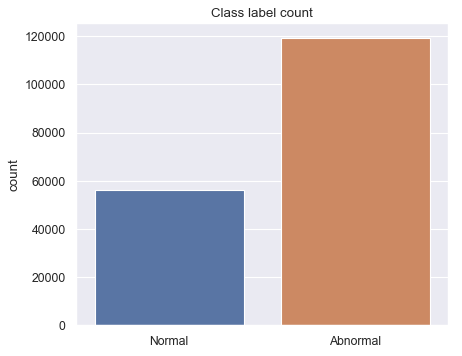

In [11]:
#Plotting count plot for label variable
x_axis_label = ['Normal' if i == 0 else 'Abnormal' for i in train_data['label']]
plot_count_plot((6,5), x_axis_label, 'Class label count')

In [12]:
print("Normal data points are ",round(train_data['label'].value_counts()[0]/sum(train_data['label'].value_counts())*100,2),"% of the total data.")
print("Normal data points are ",round(train_data['label'].value_counts()[1]/sum(train_data['label'].value_counts())*100,2),"% of the total data.")

Normal data points are  31.94 % of the total data.
Normal data points are  68.06 % of the total data.


### Observation

Here we observe that we have an imbalanced dataset. Here 31.94% of the data points belong to the normal data points, whereas rest 68.06% of the points belong to the abnormal class which means that there is malicious traffic in the network.

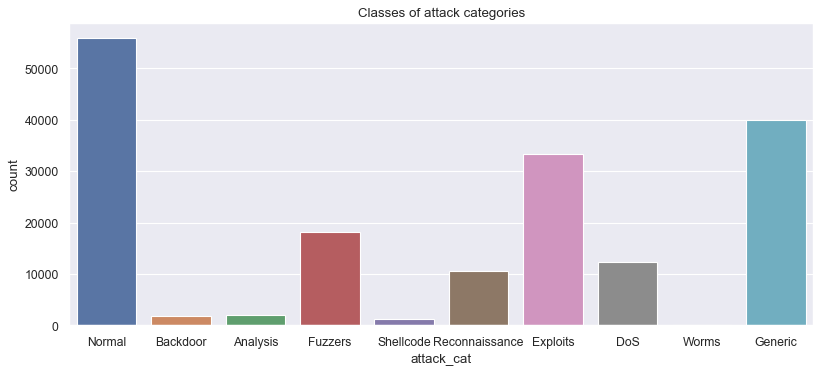

Number of  Normal  in the dataset is:  56000 ->  31.94 %.
Number of  Backdoor  in the dataset is:  1746 ->  1.0 %.
Number of  Analysis  in the dataset is:  2000 ->  1.14 %.
Number of  Fuzzers  in the dataset is:  18184 ->  10.37 %.
Number of  Shellcode  in the dataset is:  1133 ->  0.65 %.
Number of  Reconnaissance  in the dataset is:  10491 ->  5.98 %.
Number of  Exploits  in the dataset is:  33393 ->  19.04 %.
Number of  DoS  in the dataset is:  12264 ->  6.99 %.
Number of  Worms  in the dataset is:  130 ->  0.07 %.
Number of  Generic  in the dataset is:  40000 ->  22.81 %.


In [13]:
#Plotting count plot for attack_category variable
plot_count_plot((12,5), train_data['attack_cat'], 'Classes of attack categories')
for i in train_data['attack_cat'].unique():
    print("Number of ",i," in the dataset is: ",train_data['attack_cat'][train_data['attack_cat']==i].count(), "-> ",round(train_data['attack_cat'].value_counts()[i]/sum(train_data['attack_cat'].value_counts())*100,2),"%.")

### Observation

1. Here we observe that we also have a class imbalance in classes of attack categories. 
2. The results are:
    Number of  Normal  in the dataset is:  56000 ->  31.94 %.
    Number of  Backdoor  in the dataset is:  1746 ->  1.0 %.
    Number of  Analysis  in the dataset is:  2000 ->  1.14 %.
    Number of  Fuzzers  in the dataset is:  18184 ->  10.37 %.
    Number of  Shellcode  in the dataset is:  1133 ->  0.65 %.
    Number of  Reconnaissance  in the dataset is:  10491 ->  5.98 %.
    Number of  Exploits  in the dataset is:  33393 ->  19.04 %.
    Number of  DoS  in the dataset is:  12264 ->  6.99 %.
    Number of  Worms  in the dataset is:  130 ->  0.07 %.
    Number of  Generic  in the dataset is:  40000 ->  22.81 %.

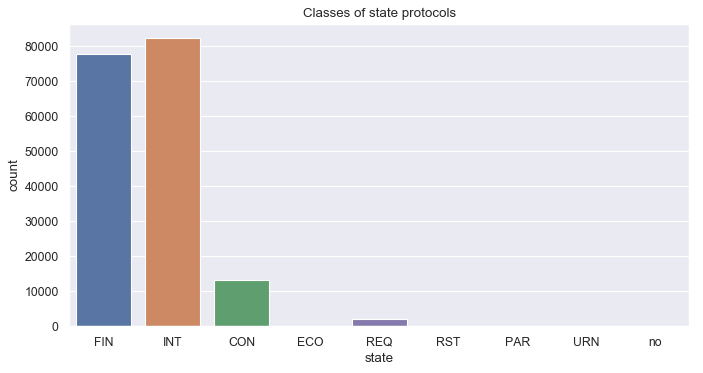

Number of  FIN  in the dataset is:  77825 ->  44.38 %.
Number of  INT  in the dataset is:  82275 ->  46.92 %.
Number of  CON  in the dataset is:  13152 ->  7.5 %.
Number of  ECO  in the dataset is:  12 ->  0.01 %.
Number of  REQ  in the dataset is:  1991 ->  1.14 %.
Number of  RST  in the dataset is:  83 ->  0.05 %.
Number of  PAR  in the dataset is:  1 ->  0.0 %.
Number of  URN  in the dataset is:  1 ->  0.0 %.
Number of  no  in the dataset is:  1 ->  0.0 %.


In [14]:
#Plotting count plot for state variable
plot_count_plot((10,5), train_data['state'], 'Classes of state protocols')
for i in train_data['state'].unique():
    print("Number of ",i," in the dataset is: ",train_data['state'][train_data['state']==i].count(), "-> ",round(train_data['state'].value_counts()[i]/sum(train_data['state'].value_counts())*100,2),"%.")

### Observations

Here we see that 91.3% of the states values comprises of FIN and INT. CON has 7.5% of the values but the rest have very less examples.

The results are: 
Number of  FIN  in the dataset is:  77825 ->  44.38 %.
Number of  INT  in the dataset is:  82275 ->  46.92 %.
Number of  CON  in the dataset is:  13152 ->  7.5 %.
Number of  ECO  in the dataset is:  12 ->  0.01 %.
Number of  REQ  in the dataset is:  1991 ->  1.14 %.
Number of  RST  in the dataset is:  83 ->  0.05 %.
Number of  PAR  in the dataset is:  1 ->  0.0 %.
Number of  URN  in the dataset is:  1 ->  0.0 %.
Number of  no  in the dataset is:  1 ->  0.0 %.

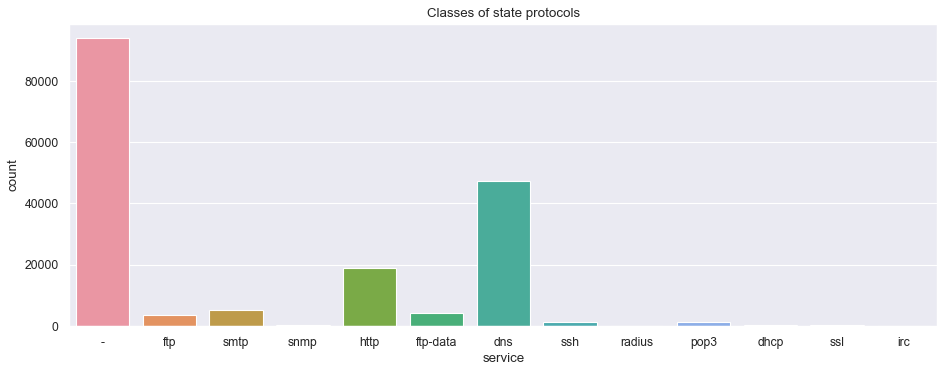

Number of  -  in the dataset is:  94168 ->  53.71 %.
Number of  ftp  in the dataset is:  3428 ->  1.96 %.
Number of  smtp  in the dataset is:  5058 ->  2.88 %.
Number of  snmp  in the dataset is:  80 ->  0.05 %.
Number of  http  in the dataset is:  18724 ->  10.68 %.
Number of  ftp-data  in the dataset is:  3995 ->  2.28 %.
Number of  dns  in the dataset is:  47294 ->  26.97 %.
Number of  ssh  in the dataset is:  1302 ->  0.74 %.
Number of  radius  in the dataset is:  12 ->  0.01 %.
Number of  pop3  in the dataset is:  1105 ->  0.63 %.
Number of  dhcp  in the dataset is:  94 ->  0.05 %.
Number of  ssl  in the dataset is:  56 ->  0.03 %.
Number of  irc  in the dataset is:  25 ->  0.01 %.


In [15]:
#Plotting count plot for state variable
plot_count_plot((14,5), train_data['service'], 'Classes of state protocols')
for i in train_data['service'].unique():
    print("Number of ",i," in the dataset is: ",train_data['state'][train_data['service']==i].count(), "-> ",round(train_data['service'].value_counts()[i]/sum(train_data['service'].value_counts())*100,2),"%.")

### Observations

Here we observe that more than 53% of the values are null which we will have to handle in the data cleaning and preprocessing stage. Rest http and dns are two important services with values 10.68% and 26.97% respectively.

The results are
    Number of  -  in the dataset is:  94168 ->  53.71 %.
    Number of  ftp  in the dataset is:  3428 ->  1.96 %.
    Number of  smtp  in the dataset is:  5058 ->  2.88 %.
    Number of  snmp  in the dataset is:  80 ->  0.05 %.
    Number of  http  in the dataset is:  18724 ->  10.68 %.
    Number of  ftp-data  in the dataset is:  3995 ->  2.28 %.
    Number of  dns  in the dataset is:  47294 ->  26.97 %.
    Number of  ssh  in the dataset is:  1302 ->  0.74 %.
    Number of  radius  in the dataset is:  12 ->  0.01 %.
    Number of  pop3  in the dataset is:  1105 ->  0.63 %.
    Number of  dhcp  in the dataset is:  94 ->  0.05 %.
    Number of  ssl  in the dataset is:  56 ->  0.03 %.
    Number of  irc  in the dataset is:  25 ->  0.01 %.

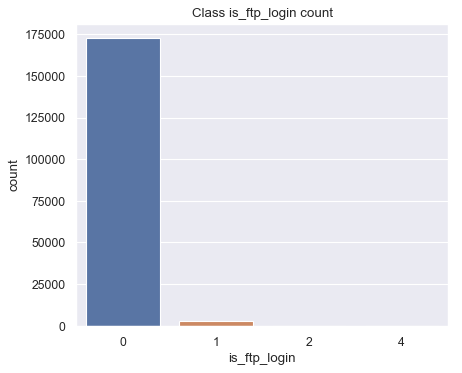

Number of  0  in the dataset is:  172774
Number of  1  in the dataset is:  2545
Number of  2  in the dataset is:  6
Number of  4  in the dataset is:  16


In [16]:
#Plotting count plot for is_ftp_login variable -- as mentioned in the feature file it is a binary file so remove entries greater than 1
plot_count_plot((6,5), train_data['is_ftp_login'], 'Class is_ftp_login count')
for i in train_data['is_ftp_login'].unique():
    print("Number of ",i," in the dataset is: ",train_data['is_ftp_login'][train_data['is_ftp_login']==i].count())

### Observations

Here we observe an anomaly. is_ftp_login is a binary type variable and hence we would need to remove data points with values 2 and 4. ALso its a very imbalanced feature with most of the values as 0 which means that the ftp session is not accessed by the user.

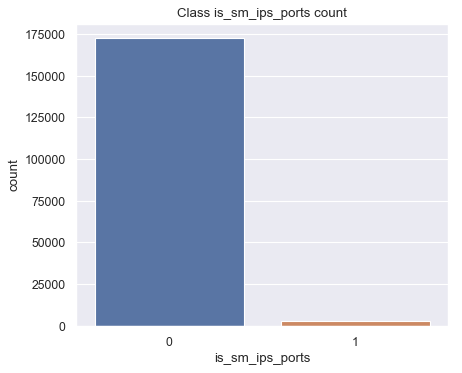

Number of  0  in the dataset is:  172579 ->  98.42 %.
Number of  1  in the dataset is:  2762 ->  1.58 %.


In [17]:
#Plotting count plot for is_sm_ips_ports variable
plot_count_plot((6,5), train_data['is_sm_ips_ports'], 'Class is_sm_ips_ports count')
for i in train_data['is_sm_ips_ports'].unique():
    print("Number of ",i," in the dataset is: ",train_data['is_sm_ips_ports'][train_data['is_sm_ips_ports']==i].count(), "-> ",round(train_data['is_sm_ips_ports'].value_counts()[i]/sum(train_data['is_sm_ips_ports'].value_counts())*100,2),"%.")

### Observations

Its a very imbalanced feature with most of the values as 0. It has 98.42% of the values are 0 for this feature. 

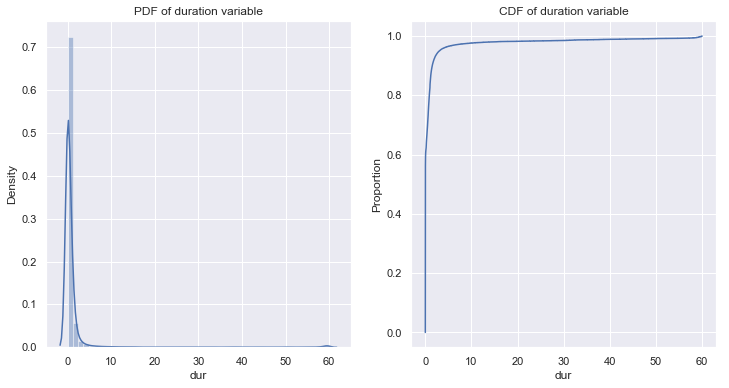

Mean duration:  1.359
Median duration:  0.002
Max duration:  60.0


In [18]:
#Plotting the pdf and cdf of duration feature
plot_pdf_and_cdf_plot((12,6), train_data['dur'], 'duration')

print("Mean duration: ", round(np.mean(train_data['dur']),3))
print("Median duration: ", round(np.median(train_data['dur']),3))
print("Max duration: ", round(np.max(train_data['dur']),3))

### Observations

Here we observe that the duration of median of data points is 0.002 and has the overall mean of 1.359. The maximum value for duration is 60 seconds which is like an outlier hence we would need to check that as well in preprocessing stage. According to cdf function we also observe that more than 95% of data points have values less than 10.

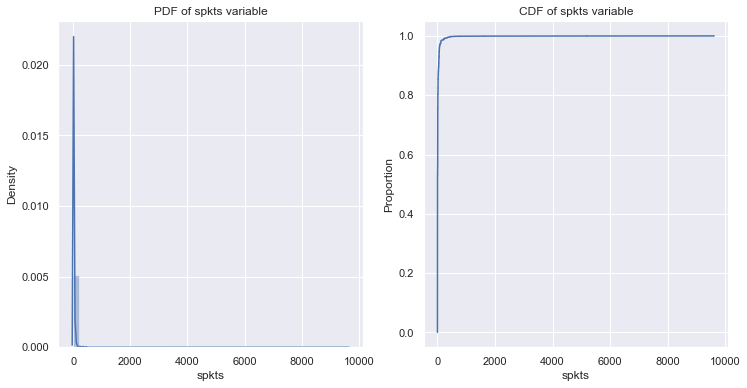

The value for  5 th percentile value is:  2
The value for  10 th percentile value is:  2
The value for  25 th percentile value is:  2
The value for  50 th percentile value is:  2
The value for  75 th percentile value is:  12
The value for  90 th percentile value is:  48
The value for  100 th percentile value is:  9616


In [19]:
#Plotting the pdf and cdf of spkts feature
plot_pdf_and_cdf_plot((12,6), train_data['spkts'], 'spkts')

spkts = np.sort(train_data['spkts'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",spkts[int(i*len(spkts))-1])

### Observations
Here we see that the 90th percentile is 48 and 100th percentile is 9616 so we wil study between 90th and 100th percentile.

In [20]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",spkts[int(i*len(spkts))-1])

The value for  91 th percentile value is:  48
The value for  92 th percentile value is:  52
The value for  93 th percentile value is:  54
The value for  94 th percentile value is:  60
The value for  95 th percentile value is:  64
The value for  96 th percentile value is:  72
The value for  97 th percentile value is:  90
The value for  98 th percentile value is:  122
The value for  99 th percentile value is:  234
The value for  100 th percentile value is:  9616


### Observations
Here we see that the 99th percentile is 234 and 100th is 9616 and we can say that values more than 234 are outliers.

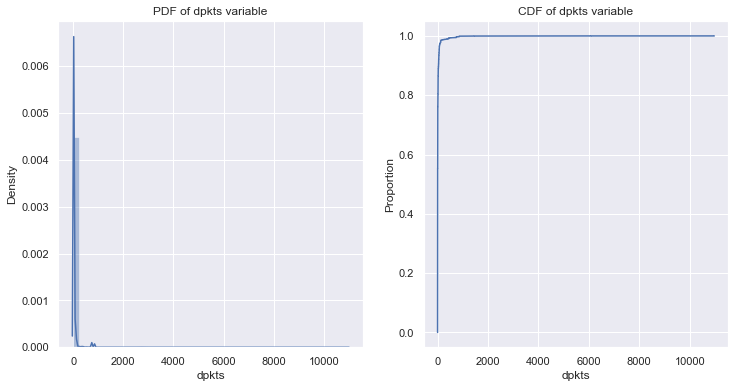

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  2
The value for  75 th percentile value is:  10
The value for  90 th percentile value is:  38
The value for  100 th percentile value is:  10974


In [21]:
#Plotting the pdf and cdf of dpkts feature
plot_pdf_and_cdf_plot((12,6), train_data['dpkts'], 'dpkts')

dpkts = np.sort(train_data['dpkts'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dpkts[int(i*len(dpkts))-1])

### Observations
Here we observe that untill 25th percentile the value of dpkts remains 0. Also, we see that the 90th percentile is 38 and 100th percentile is 10974 so we wil study between 90th and 100th percentile.

In [22]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dpkts[int(i*len(dpkts))-1])

The value for  91 th percentile value is:  42
The value for  92 th percentile value is:  44
The value for  93 th percentile value is:  50
The value for  94 th percentile value is:  54
The value for  95 th percentile value is:  62
The value for  96 th percentile value is:  68
The value for  97 th percentile value is:  80
The value for  98 th percentile value is:  126
The value for  99 th percentile value is:  400
The value for  100 th percentile value is:  10974


### Observations
Here we see that the 99th percentile is 400 and 100th is 10974 and we can say that values more than 400 are outliers.

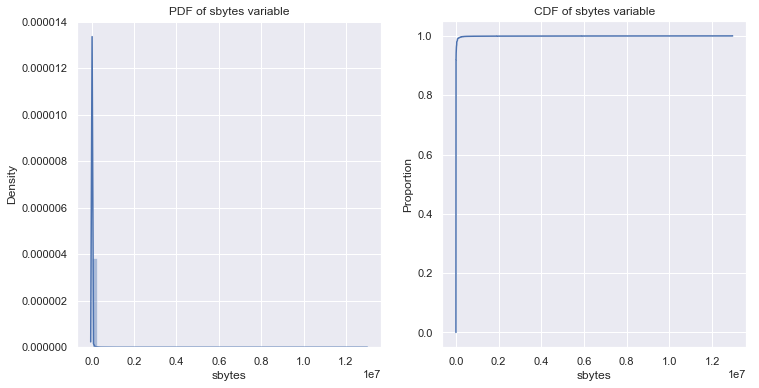

The value for  5 th percentile value is:  114
The value for  10 th percentile value is:  114
The value for  25 th percentile value is:  114
The value for  50 th percentile value is:  430
The value for  75 th percentile value is:  1418
The value for  90 th percentile value is:  4190
The value for  100 th percentile value is:  12965233


In [23]:
#Plotting the pdf and cdf of sbytes feature
plot_pdf_and_cdf_plot((12,6), train_data['sbytes'], 'sbytes')

sbytes = np.sort(train_data['sbytes'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sbytes[int(i*len(sbytes))-1])

### Observations

Here we see that the 90th percentile is 4190 and 100th percentile is 12965233 so we wil study between 90th and 100th percentile.

In [24]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sbytes[int(i*len(sbytes))-1])

The value for  91 th percentile value is:  4550
The value for  92 th percentile value is:  5248
The value for  93 th percentile value is:  7818
The value for  94 th percentile value is:  9222
The value for  95 th percentile value is:  13662
The value for  96 th percentile value is:  19312
The value for  97 th percentile value is:  34982
The value for  98 th percentile value is:  40408
The value for  99 th percentile value is:  74087
The value for  100 th percentile value is:  12965233


### Observations
Here we see that the 99th percentile is 74087 and 100th is 12965233 and we can say that values more than 74087 are outliers.

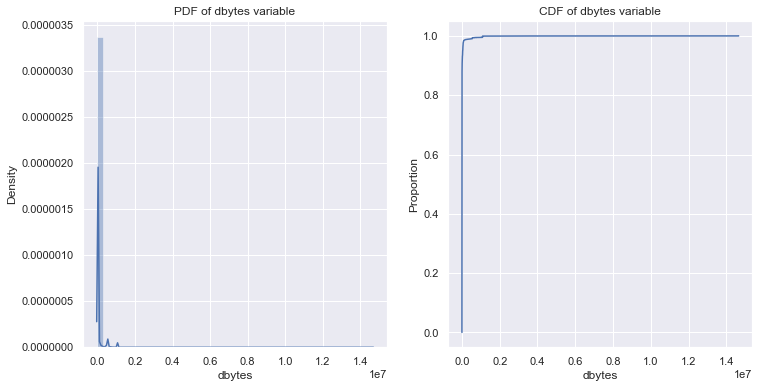

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  164
The value for  75 th percentile value is:  1102
The value for  90 th percentile value is:  10168
The value for  100 th percentile value is:  14655550


In [25]:
#Plotting the pdf and cdf of dbytes feature
plot_pdf_and_cdf_plot((12,6), train_data['dbytes'], 'dbytes')

dbytes = np.sort(train_data['dbytes'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dbytes[int(i*len(dbytes))-1])

### Observations
Here we see that the 90th percentile is 10168 and 100th percentile is 14655550 so we wil study between 90th and 100th percentile.

In [26]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dbytes[int(i*len(dbytes))-1])

The value for  91 th percentile value is:  12298
The value for  92 th percentile value is:  16040
The value for  93 th percentile value is:  23508
The value for  94 th percentile value is:  32642
The value for  95 th percentile value is:  39076
The value for  96 th percentile value is:  50036
The value for  97 th percentile value is:  59460
The value for  98 th percentile value is:  75600
The value for  99 th percentile value is:  474360
The value for  100 th percentile value is:  14655550


### Observations
Here we see that the 99th percentile is 474360 and 100th is 14655550 and we can say that values more than 474360 are outliers.

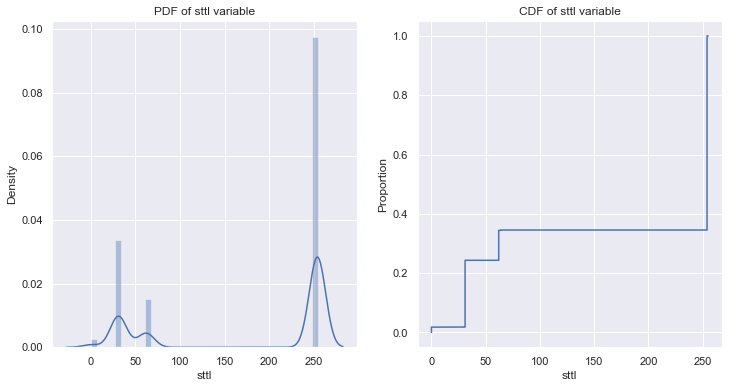

The value for  5 th percentile value is:  31
The value for  10 th percentile value is:  31
The value for  25 th percentile value is:  62
The value for  50 th percentile value is:  254
The value for  75 th percentile value is:  254
The value for  90 th percentile value is:  254
The value for  100 th percentile value is:  255


In [27]:
#Plotting the pdf and cdf of sttl feature
plot_pdf_and_cdf_plot((12,6), train_data['sttl'], 'sttl')

sttl = np.sort(train_data['sttl'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sttl[int(i*len(sttl))-1])

### Observations
This seems okay and will work with the feature dataset.

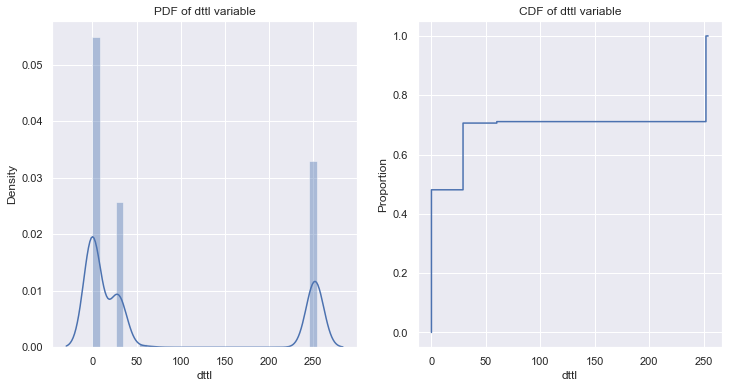

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  29
The value for  75 th percentile value is:  252
The value for  90 th percentile value is:  252
The value for  100 th percentile value is:  254


In [28]:
#Plotting the pdf and cdf of dttl feature
plot_pdf_and_cdf_plot((12,6), train_data['dttl'], 'dttl')
dttl = np.sort(train_data['dttl'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dttl[int(i*len(dttl))-1])

### Observations
This seems okay and will work with the feature dataset.

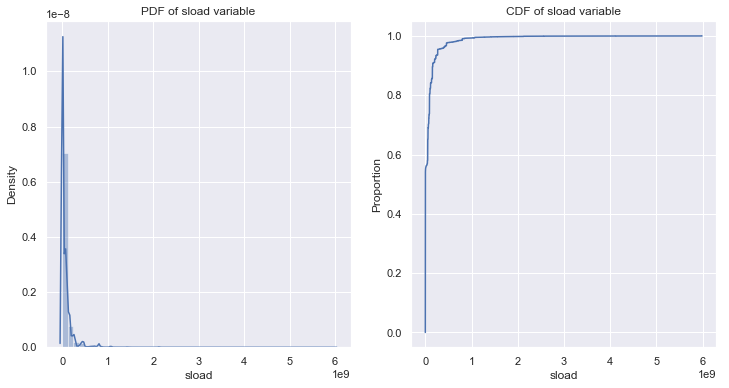

The value for  5 th percentile value is:  2358.739014
The value for  10 th percentile value is:  4610.527344
The value for  25 th percentile value is:  13053.33887
The value for  50 th percentile value is:  879616.25
The value for  75 th percentile value is:  88888888.0
The value for  90 th percentile value is:  160000000.0
The value for  100 th percentile value is:  5988000256.0


In [29]:
#Plotting the pdf and cdf of sload feature
plot_pdf_and_cdf_plot((12,6), train_data['sload'], 'sload')

sload = np.sort(train_data['sload'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sload[int(i*len(sload))-1])

### Observations
This seems okay and will work with the feature dataset.

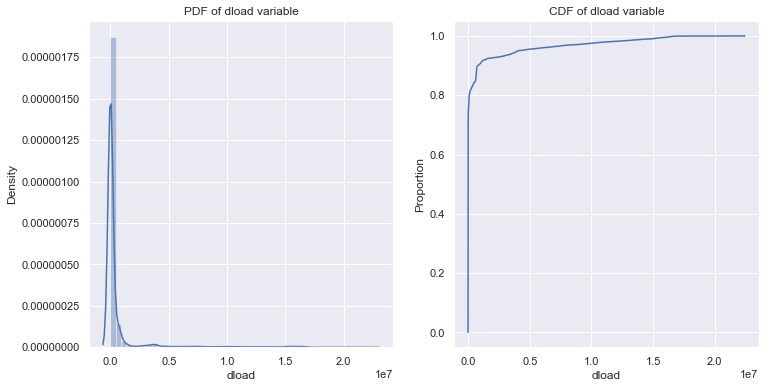

The value for  5 th percentile value is:  0.0
The value for  10 th percentile value is:  0.0
The value for  25 th percentile value is:  0.0
The value for  50 th percentile value is:  1446.896606
The value for  75 th percentile value is:  27835.65039
The value for  90 th percentile value is:  792873.0
The value for  100 th percentile value is:  22422730.0


In [30]:
#Plotting the pdf and cdf of dload feature
plot_pdf_and_cdf_plot((12,6), train_data['dload'], 'dload')

dload = np.sort(train_data['dload'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dload[int(i*len(dload))-1])

### Observations
This seems okay and will work with the feature dataset.

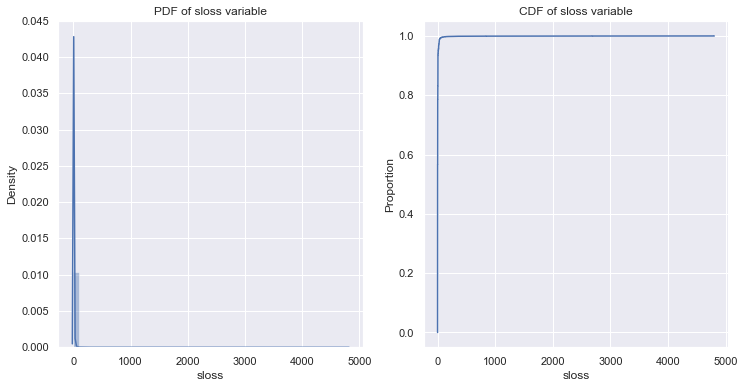

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  3
The value for  90 th percentile value is:  7
The value for  100 th percentile value is:  4803


In [31]:
#Plotting the pdf and cdf of sloss feature
plot_pdf_and_cdf_plot((12,6), train_data['sloss'], 'sloss')

sloss = np.sort(train_data['sloss'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sloss[int(i*len(sloss))-1])

### Observations

The value for  90 th percentile value is:  7
The value for  100 th percentile value is:  4803
So we will further see 91-100 percentile values

In [32]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sloss[int(i*len(sloss))-1])

The value for  91 th percentile value is:  7
The value for  92 th percentile value is:  7
The value for  93 th percentile value is:  7
The value for  94 th percentile value is:  9
The value for  95 th percentile value is:  12
The value for  96 th percentile value is:  18
The value for  97 th percentile value is:  21
The value for  98 th percentile value is:  27
The value for  99 th percentile value is:  38
The value for  100 th percentile value is:  4803


### Observations
The value for  99 th percentile value is:  38
The value for  100 th percentile value is:  4803
Hence we can conclude that values more than 38 are outliers and can be removed.

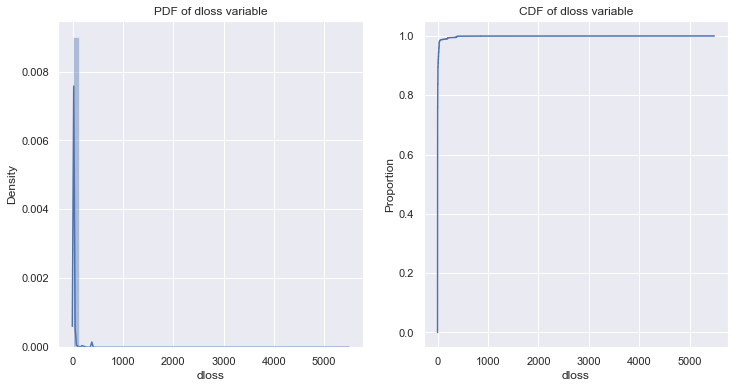

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  2
The value for  90 th percentile value is:  9
The value for  100 th percentile value is:  5484


In [33]:
#Plotting the pdf and cdf of dloss feature
plot_pdf_and_cdf_plot((12,6), train_data['dloss'], 'dloss')
dloss = np.sort(train_data['dloss'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dloss[int(i*len(dloss))-1])

### Observations
The value for  90 th percentile value is:  9
The value for  100 th percentile value is:  5484
Hence we will investigate further for 91-100 percentile values.

In [34]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dloss[int(i*len(dloss))-1])

The value for  91 th percentile value is:  13
The value for  92 th percentile value is:  15
The value for  93 th percentile value is:  17
The value for  94 th percentile value is:  18
The value for  95 th percentile value is:  24
The value for  96 th percentile value is:  27
The value for  97 th percentile value is:  31
The value for  98 th percentile value is:  36
The value for  99 th percentile value is:  178
The value for  100 th percentile value is:  5484


### Observations
Since 99th percentile is 178 and 100th is 5484. Hence values greater than 178 can be termed as outliers and can be ignored.

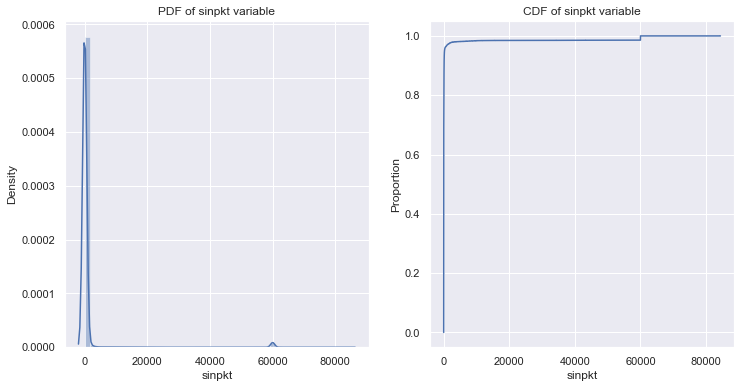

The value for  5 th percentile value is:  0.003
The value for  10 th percentile value is:  0.003
The value for  25 th percentile value is:  0.008
The value for  50 th percentile value is:  0.279723
The value for  75 th percentile value is:  55.154667
The value for  90 th percentile value is:  121.309
The value for  100 th percentile value is:  84371.496


In [35]:
#Plotting the pdf and cdf of sinpkt feature
plot_pdf_and_cdf_plot((12,6), train_data['sinpkt'], 'sinpkt')

sinpkt = np.sort(train_data['sinpkt'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sinpkt[int(i*len(sinpkt))-1])

### Observations
The value for  90 th percentile value is:  121.309
The value for  100 th percentile value is:  84371.496
Hence we will investigate further for 91-100 percentile values.

In [36]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sinpkt[int(i*len(sinpkt))-1])

The value for  91 th percentile value is:  131.156333
The value for  92 th percentile value is:  144.251111
The value for  93 th percentile value is:  162.968003
The value for  94 th percentile value is:  191.515006
The value for  95 th percentile value is:  245.12583
The value for  96 th percentile value is:  434.760656
The value for  97 th percentile value is:  1122.594375
The value for  98 th percentile value is:  3489.501
The value for  99 th percentile value is:  60000.656
The value for  100 th percentile value is:  84371.496


### Observations
Values greater than 434 which is 96th percentile seems to be outliers and can be removed.

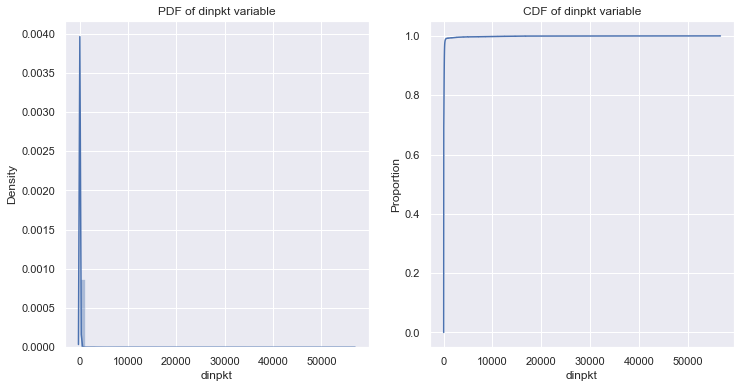

The value for  5 th percentile value is:  0.0
The value for  10 th percentile value is:  0.0
The value for  25 th percentile value is:  0.0
The value for  50 th percentile value is:  0.006
The value for  75 th percentile value is:  51.052715
The value for  90 th percentile value is:  113.768664
The value for  100 th percentile value is:  56716.824


In [37]:
#Plotting the pdf and cdf of dinpkt feature
plot_pdf_and_cdf_plot((12,6), train_data['dinpkt'], 'dinpkt')

dinpkt = np.sort(train_data['dinpkt'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dinpkt[int(i*len(dinpkt))-1])

### Observations
The value for  90 th percentile value is:  113.768664.
The value for  100 th percentile value is:  56716.824.
Hence we will investigate further for 91-100 percentile values.

In [38]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dinpkt[int(i*len(dinpkt))-1])

The value for  91 th percentile value is:  120.395398
The value for  92 th percentile value is:  127.947
The value for  93 th percentile value is:  136.948422
The value for  94 th percentile value is:  147.754594
The value for  95 th percentile value is:  160.490235
The value for  96 th percentile value is:  177.382141
The value for  97 th percentile value is:  203.245719
The value for  98 th percentile value is:  251.892
The value for  99 th percentile value is:  441.272531
The value for  100 th percentile value is:  56716.824


### Observations
The value for  99 th percentile value is:  441.272531
The value for  100 th percentile value is:  56716.824
We can remove values greater than 441.272531 as they seems to be outliers.

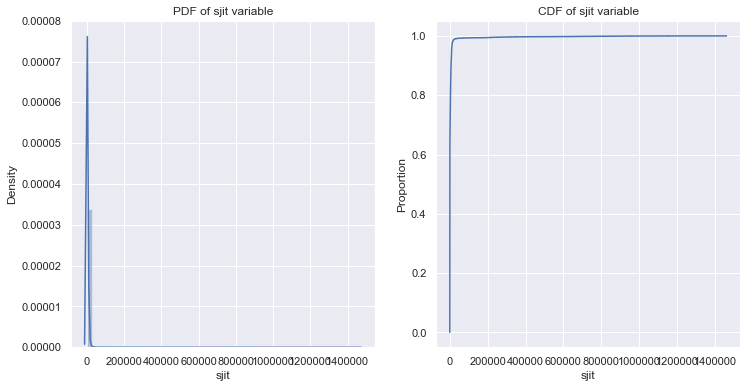

The value for  5 th percentile value is:  0.0
The value for  10 th percentile value is:  0.0
The value for  25 th percentile value is:  0.0
The value for  50 th percentile value is:  0.0
The value for  75 th percentile value is:  2513.167006
The value for  90 th percentile value is:  6410.804136
The value for  100 th percentile value is:  1460480.016


In [39]:
#Plotting the pdf and cdf of sjit feature
plot_pdf_and_cdf_plot((12,6), train_data['sjit'], 'sjit')

sjit = np.sort(train_data['sjit'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sjit[int(i*len(sjit))-1])

### Observations
Most of the values until 50th percentile are 0.
The value for  90 th percentile value is:  6410.804136
The value for  100 th percentile value is:  1460480.016
Hence we will investigate further for 91-100 percentile values.

In [40]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",sjit[int(i*len(dinpkt))-1])

The value for  91 th percentile value is:  6910.443367
The value for  92 th percentile value is:  7550.354351
The value for  93 th percentile value is:  8307.240501
The value for  94 th percentile value is:  8803.082572
The value for  95 th percentile value is:  9503.761139
The value for  96 th percentile value is:  9988.70593
The value for  97 th percentile value is:  11560.18818
The value for  98 th percentile value is:  14866.6102
The value for  99 th percentile value is:  28804.12607
The value for  100 th percentile value is:  1460480.016


### Observations
The value for  99 th percentile value is:  28804.12607.
The value for  100 th percentile value is:  1460480.016.
We can remove values greater than 28804.12607 as they seems to be outliers.

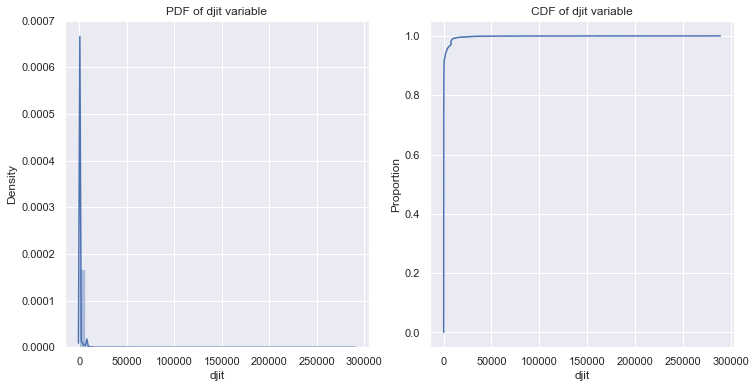

The value for  5 th percentile value is:  0.0
The value for  10 th percentile value is:  0.0
The value for  25 th percentile value is:  0.0
The value for  50 th percentile value is:  0.0
The value for  75 th percentile value is:  114.980734
The value for  90 th percentile value is:  386.064292
The value for  100 th percentile value is:  289388.2697


In [41]:
#Plotting the pdf and cdf of djit feature
plot_pdf_and_cdf_plot((12,6), train_data['djit'], 'djit')
djit = np.sort(train_data['djit'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",djit[int(i*len(djit))-1])

### Observations
Most of the values until 50th percentile are 0. The value for 90 th percentile value is: 386.064292 The value for 100 th percentile value is: 289388.2697 Hence we will investigate further for 91-100 percentile values.

In [42]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",djit[int(i*len(djit))-1])

The value for  91 th percentile value is:  475.888526
The value for  92 th percentile value is:  734.64175
The value for  93 th percentile value is:  1342.434968
The value for  94 th percentile value is:  1929.683689
The value for  95 th percentile value is:  3054.518682
The value for  96 th percentile value is:  4460.694795
The value for  97 th percentile value is:  7609.984713
The value for  98 th percentile value is:  7718.175489
The value for  99 th percentile value is:  9465.539755
The value for  100 th percentile value is:  289388.2697


### Observations
The value for 99 th percentile value is: 9465.539755. The value for 100 th percentile value is: 289388.2697. We can remove values greater than 9465.539755 as they seems to be outliers.

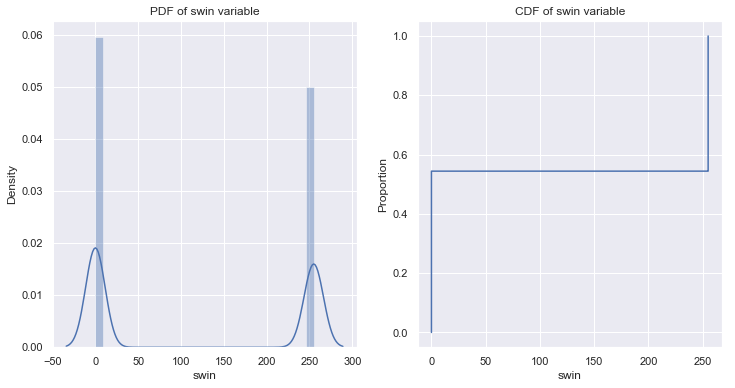

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  255
The value for  90 th percentile value is:  255
The value for  100 th percentile value is:  255


In [43]:
#Plotting the pdf and cdf of swin feature
plot_pdf_and_cdf_plot((12,6), train_data['swin'], 'swin')

swin = np.sort(train_data['swin'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",swin[int(i*len(swin))-1])

### Observations
This feature has only 2 values: 0 and 255

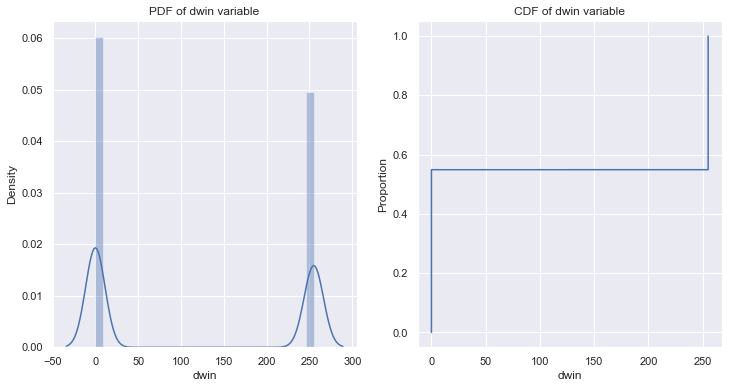

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  255
The value for  90 th percentile value is:  255
The value for  100 th percentile value is:  255


In [44]:
#Plotting the pdf and cdf of dwin feature
plot_pdf_and_cdf_plot((12,6), train_data['dwin'], 'dwin')
dwin = np.sort(train_data['dwin'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dwin[int(i*len(dwin))-1])

### Observations
The feature has only two values namely:0 and 255

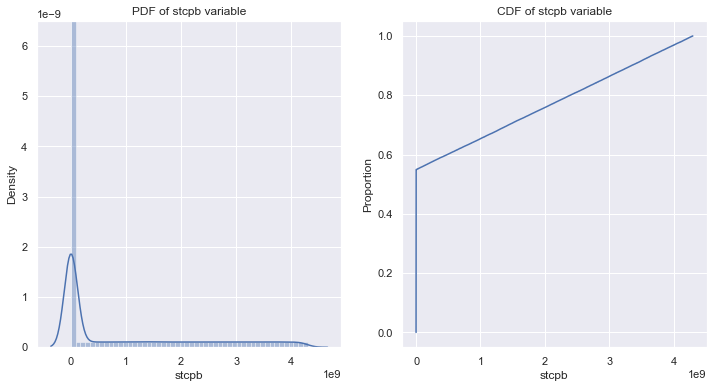

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  1916651334
The value for  90 th percentile value is:  3343574210
The value for  100 th percentile value is:  4294958913


In [45]:
#Plotting the pdf and cdf of stcpb feature
plot_pdf_and_cdf_plot((12,6), train_data['stcpb'], 'stcpb')
stcpb = np.sort(train_data['stcpb'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",stcpb[int(i*len(stcpb))-1])


### Observations
This is a sequence number feild we will use it.

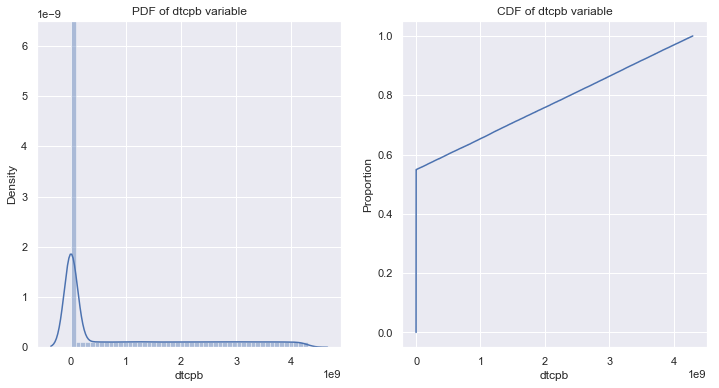

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  1913670479
The value for  90 th percentile value is:  3337033585
The value for  100 th percentile value is:  4294881924


In [46]:
#Plotting the pdf and cdf of dtcpb feature
plot_pdf_and_cdf_plot((12,6), train_data['dtcpb'], 'dtcpb')
dtcpb = np.sort(train_data['dtcpb'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dtcpb[int(i*len(dtcpb))-1])

### Observations
This is a sequence number feild we will use it.

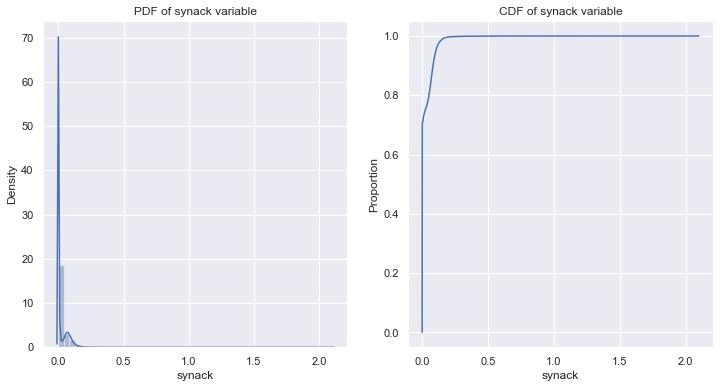

The value for  5 th percentile value is:  0.0
The value for  10 th percentile value is:  0.0
The value for  25 th percentile value is:  0.0
The value for  50 th percentile value is:  0.0
The value for  75 th percentile value is:  0.02326
The value for  90 th percentile value is:  0.082202
The value for  100 th percentile value is:  2.100352


In [47]:
#Plotting the pdf and cdf of synack feature
plot_pdf_and_cdf_plot((12,6), train_data['synack'], 'synack')
synack = np.sort(train_data['synack'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",synack[int(i*len(synack))-1])

### Observations
The value for  90 th percentile value is:  0.082202.
The value for  100 th percentile value is:  2.100352.
Hence we will investigate it further for 91-100 percentile values.

In [48]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",synack[int(i*len(synack))-1])

The value for  91 th percentile value is:  0.085653
The value for  92 th percentile value is:  0.089427
The value for  93 th percentile value is:  0.093753
The value for  94 th percentile value is:  0.098246
The value for  95 th percentile value is:  0.103571
The value for  96 th percentile value is:  0.11033
The value for  97 th percentile value is:  0.119321
The value for  98 th percentile value is:  0.131929
The value for  99 th percentile value is:  0.155621
The value for  100 th percentile value is:  2.100352


### Observations
We can remove data points which have the values greater than 0.155621. They seem to be outliers.

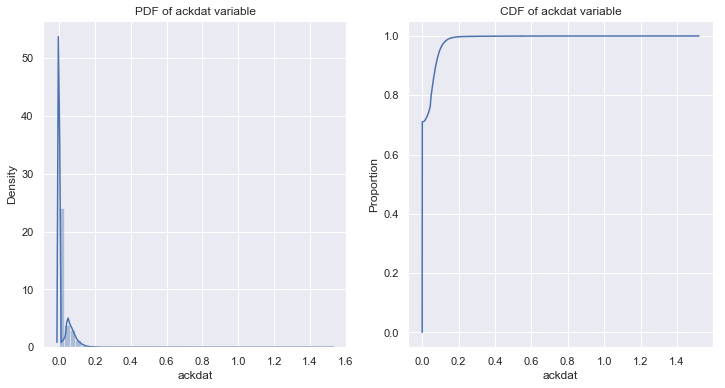

The value for  5 th percentile value is:  0.0
The value for  10 th percentile value is:  0.0
The value for  25 th percentile value is:  0.0
The value for  50 th percentile value is:  0.0
The value for  75 th percentile value is:  0.038905
The value for  90 th percentile value is:  0.074626
The value for  100 th percentile value is:  1.520884


In [49]:
#Plotting the pdf and cdf of ackdat feature
plot_pdf_and_cdf_plot((12,6), train_data['ackdat'], 'ackdat')
ackdat = np.sort(train_data['ackdat'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",ackdat[int(i*len(ackdat))-1])

### Observations
The value for  90 th percentile value is:  0.074626.
The value for  100 th percentile value is:  1.520884.
Hence we will investigate further

In [50]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",ackdat[int(i*len(ackdat))-1])

The value for  91 th percentile value is:  0.078034
The value for  92 th percentile value is:  0.081586
The value for  93 th percentile value is:  0.085598
The value for  94 th percentile value is:  0.090293
The value for  95 th percentile value is:  0.095469
The value for  96 th percentile value is:  0.10229
The value for  97 th percentile value is:  0.11106
The value for  98 th percentile value is:  0.123232
The value for  99 th percentile value is:  0.145044
The value for  100 th percentile value is:  1.520884


### Observations
We will keep this feature as it is.

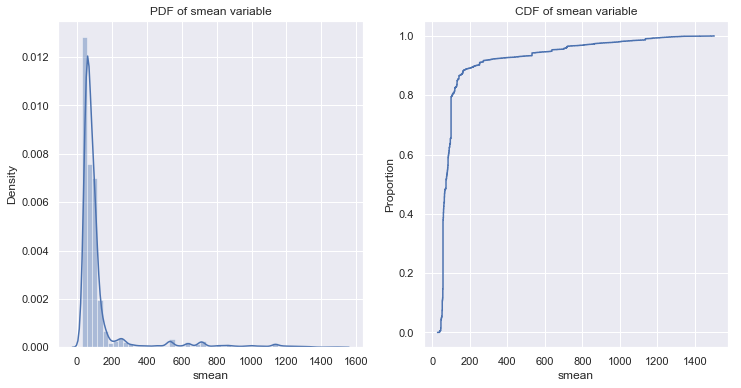

The value for  5 th percentile value is:  49
The value for  10 th percentile value is:  53
The value for  25 th percentile value is:  57
The value for  50 th percentile value is:  73
The value for  75 th percentile value is:  100
The value for  90 th percentile value is:  232
The value for  100 th percentile value is:  1504


In [51]:
#Plotting the pdf and cdf of smean feature
plot_pdf_and_cdf_plot((12,6), train_data['smean'], 'smean')
smean = np.sort(train_data['smean'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",smean[int(i*len(smean))-1])


### Observations
The value for  90 th percentile value is:  232.
The value for  100 th percentile value is:  1504.
Hence lets investigate further for 91-100 percentiles.

In [52]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",smean[int(i*len(smean))-1])

The value for  91 th percentile value is:  254
The value for  92 th percentile value is:  307
The value for  93 th percentile value is:  458
The value for  94 th percentile value is:  532
The value for  95 th percentile value is:  638
The value for  96 th percentile value is:  716
The value for  97 th percentile value is:  811
The value for  98 th percentile value is:  994
The value for  99 th percentile value is:  1137
The value for  100 th percentile value is:  1504


### Observations
The value for  98 th percentile value is:  994.
The value for  99 th percentile value is:  1137.
The value for  100 th percentile value is:  1504.
We will keep this feature as it is.

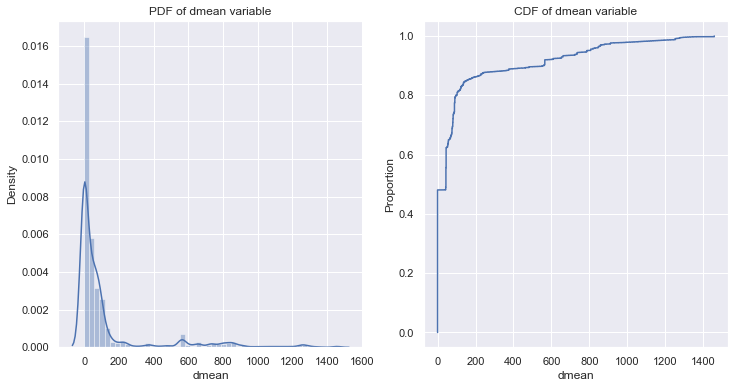

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  44
The value for  75 th percentile value is:  89
The value for  90 th percentile value is:  560
The value for  100 th percentile value is:  1458


In [53]:
#Plotting the pdf and cdf of dmean feature
plot_pdf_and_cdf_plot((12,6), train_data['dmean'], 'dmean')
dmean = np.sort(train_data['dmean'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dmean[int(i*len(dmean))-1])

### Observations
The value for 90 th percentile value is: 560. The value for 100 th percentile value is: 1458. Hence lets investigate further for 91-100 percentiles.

In [54]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",dmean[int(i*len(dmean))-1])

The value for  91 th percentile value is:  565
The value for  92 th percentile value is:  581
The value for  93 th percentile value is:  661
The value for  94 th percentile value is:  735
The value for  95 th percentile value is:  786
The value for  96 th percentile value is:  837
The value for  97 th percentile value is:  866
The value for  98 th percentile value is:  1038
The value for  99 th percentile value is:  1252
The value for  100 th percentile value is:  1458


### Observations
The value for  98 th percentile value is:  1038
The value for  99 th percentile value is:  1252
The value for  100 th percentile value is:  1458
We will keep this feature as it is.

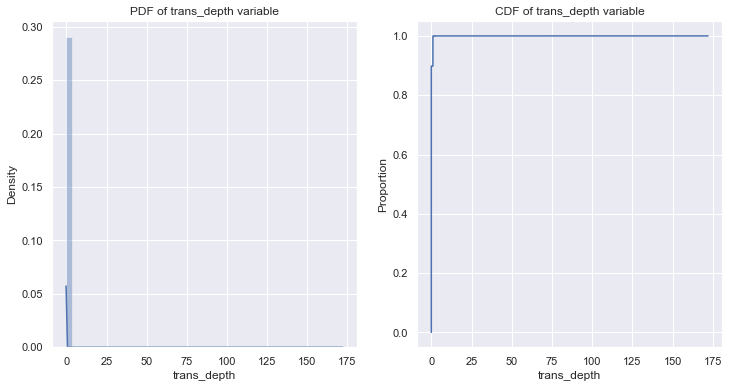

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  0
The value for  90 th percentile value is:  1
The value for  100 th percentile value is:  172


In [55]:
#Plotting the pdf and cdf of trans_depth feature
plot_pdf_and_cdf_plot((12,6), train_data['trans_depth'], 'trans_depth')
trans_depth = np.sort(train_data['trans_depth'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",trans_depth[int(i*len(trans_depth))-1])

### Observations
The value for  90 th percentile value is:  1
The value for  100 th percentile value is:  172
Lets investigate further for 91-100 percentile values.

In [56]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",trans_depth[int(i*len(trans_depth))-1])

The value for  91 th percentile value is:  1
The value for  92 th percentile value is:  1
The value for  93 th percentile value is:  1
The value for  94 th percentile value is:  1
The value for  95 th percentile value is:  1
The value for  96 th percentile value is:  1
The value for  97 th percentile value is:  1
The value for  98 th percentile value is:  1
The value for  99 th percentile value is:  1
The value for  100 th percentile value is:  172


### Observations
We will investigate further

In [57]:
for i in [0.99991, 0.99992, 0.99993, 0.99994, 0.99995, 0.99996, 0.99997, 0.99998, 0.99999, 1]:
    print("The value for ",i*100,"th percentile value is: ",trans_depth[int(i*len(trans_depth))-1])

The value for  99.991 th percentile value is:  2
The value for  99.992 th percentile value is:  2
The value for  99.993 th percentile value is:  2
The value for  99.994 th percentile value is:  3
The value for  99.995 th percentile value is:  4
The value for  99.996 th percentile value is:  4
The value for  99.997 th percentile value is:  5
The value for  99.998 th percentile value is:  39
The value for  99.99900000000001 th percentile value is:  155
The value for  100 th percentile value is:  172


### Observations 
We will remove values greater than 2

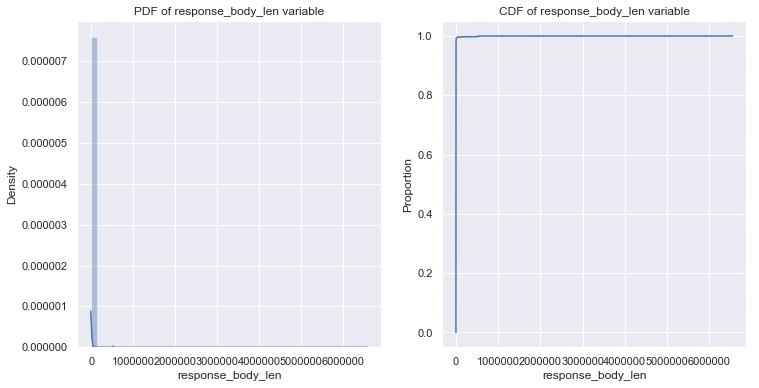

The value for  5 th percentile value is:  0
The value for  10 th percentile value is:  0
The value for  25 th percentile value is:  0
The value for  50 th percentile value is:  0
The value for  75 th percentile value is:  0
The value for  90 th percentile value is:  0
The value for  100 th percentile value is:  6558056


In [58]:
#Plotting the pdf and cdf of response_body_len feature
plot_pdf_and_cdf_plot((12,6), train_data['response_body_len'], 'response_body_len')
response_body_len = np.sort(train_data['response_body_len'].values)
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1]:
    print("The value for ",int(i*100),"th percentile value is: ",response_body_len[int(i*len(response_body_len))-1])

In [59]:
for i in [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]:
    print("The value for ",i*100,"th percentile value is: ",response_body_len[int(i*len(response_body_len))-1])

The value for  91.0 th percentile value is:  0
The value for  92.0 th percentile value is:  0
The value for  93.0 th percentile value is:  0
The value for  94.0 th percentile value is:  83
The value for  95.0 th percentile value is:  166
The value for  96.0 th percentile value is:  321
The value for  97.0 th percentile value is:  1663
The value for  98.0 th percentile value is:  3924
The value for  99.0 th percentile value is:  3924
The value for  100 th percentile value is:  6558056


### Observations
The value for response body length feature remains 0 until 93 percentile.

### Plotting all the highly correlated features

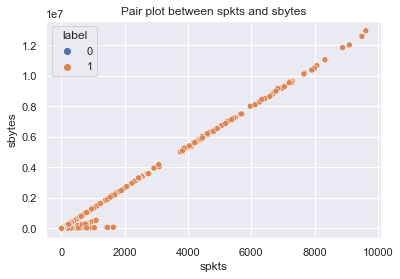

In [60]:
#Plotting pair plots for highly correlated features: spkts, sbytes and sloss
sns.scatterplot(train_data['spkts'], train_data['sbytes'], hue=train_data['label'])
plt.title("Pair plot between spkts and sbytes")
plt.show()

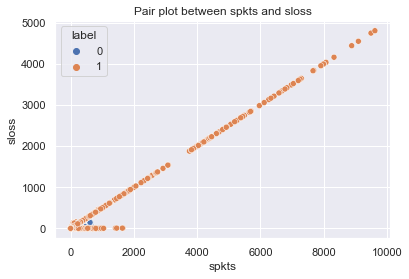

In [61]:
#Plotting pair plots for highly correlated features: spkts, sbytes and sloss
sns.scatterplot(train_data['spkts'], train_data['sloss'], hue=train_data['label'])
plt.title("Pair plot between spkts and sloss")
plt.show()

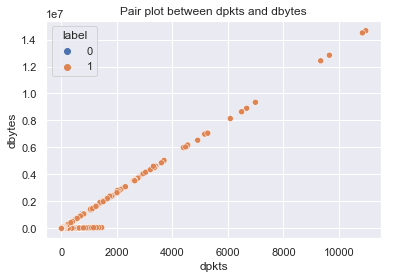

In [62]:
#Plotting pair plots for highly correlated features: dpkts, dbytes and dloss
sns.scatterplot(train_data['dpkts'], train_data['dbytes'], hue=train_data['label'])
plt.title("Pair plot between dpkts and dbytes")
plt.show()

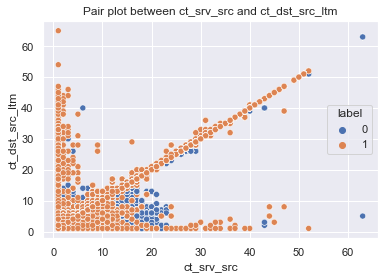

In [63]:
#Plotting pair plots for highly correlated features: ct_srv_src, and ct_dst_src_ltm
sns.scatterplot(train_data['ct_srv_src'], train_data['ct_dst_src_ltm'], hue=train_data['label'])
plt.title("Pair plot between ct_srv_src and ct_dst_src_ltm")
plt.show()

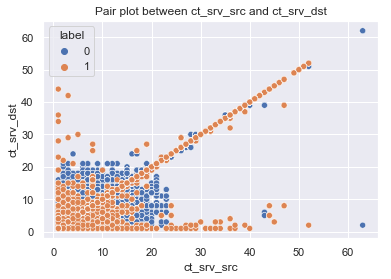

In [64]:
#Plotting pair plots for highly correlated features: ct_srv_src, and ct_srv_dst
sns.scatterplot(train_data['ct_srv_src'], train_data['ct_srv_dst'], hue=train_data['label'])
plt.title("Pair plot between ct_srv_src and ct_srv_dst")
plt.show()

## Observations overall
1. We need to handle the null values for service and state categorical variables.
2. Handle is_ftp_login binary feature by removing values greater than 1 for that.
3. Handle spkts features by removing values greater than 234.
4. Handle dpkts features by removing values greater than 400.
5. Handle sbytes features by removing values greater than 74087.
6. Handle dbytes features by removing values greater than 474360.
7. Handle sloss features by removing values greater than 38.
8. Handle dloss features by removing values greater than 178.
9. Handle sinpkt features by removing values greater than 434.
10. Handle dinpkt features by removing values greater than 441.
11. Handle sjit features by removing values greater than 28805.
12. Handle djit features by removing values greater than 9466.
13. Handle synack features by removing values greater than 0.16.
14. Handle ackdat features by removing values greater than 0.15.
15. Handle trans_depth features by removing values greater than 2.
16. We need to handle all the highly correlatd features as well. We know that highly correlated features does not help in the classification task.